In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

plt.style.use('ggplot')

fifa_train = pd.read_csv("/content/drive/My Drive/dacon/soccer_predict/FIFA_train.csv")

In [3]:
# 데이터 형태 확인
fifa_train.shape

(8932, 12)

In [4]:
fifa_train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


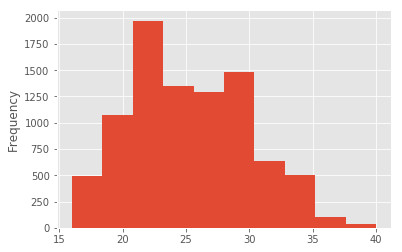

In [5]:
# 나이 분포 활용하기
fifa_train['age'].plot.hist()

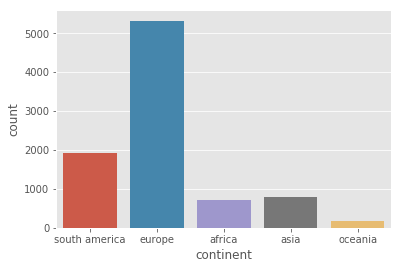

In [15]:
sns.countplot(fifa_train['continent'])

## 어떤 대륙이 가장 비쌀까?

In [0]:
c = fifa_train.groupby(['continent'])['value'].mean()

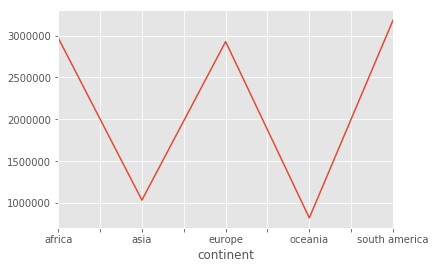

In [21]:
c.plot()

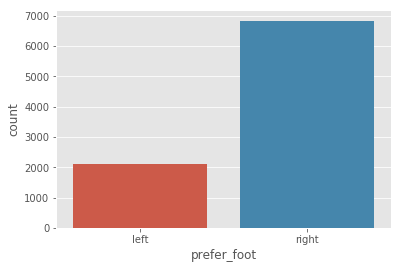

In [22]:
sns.countplot(fifa_train['prefer_foot'])

In [23]:
fifa_train.groupby(['prefer_foot'])['value'].mean()

prefer_foot
left     2.865232e+06
right    2.752150e+06
Name: value, dtype: float64

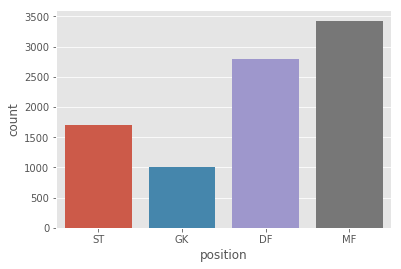

In [25]:
sns.countplot(fifa_train['position'])

In [0]:
v = fifa_train.groupby(['position'])['value'].mean()

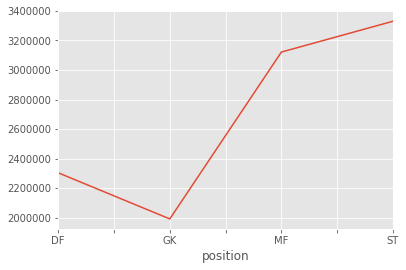

In [30]:
v.plot()

## 현재 능력치와 잠재 능력치의 확인

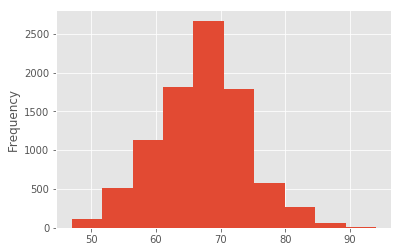

In [31]:
fifa_train['stat_overall'].plot.hist()

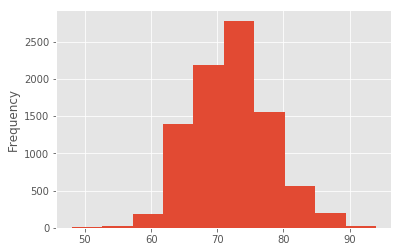

In [32]:
fifa_train['stat_potential'].plot.hist()

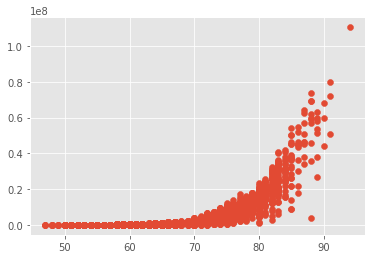

In [33]:
plt.scatter(fifa_train['stat_overall'], fifa_train['value'])

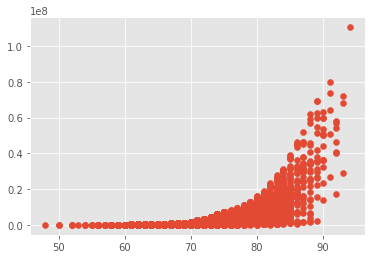

In [34]:
plt.scatter(fifa_train['stat_potential'], fifa_train['value'])

## 나이대별 가격

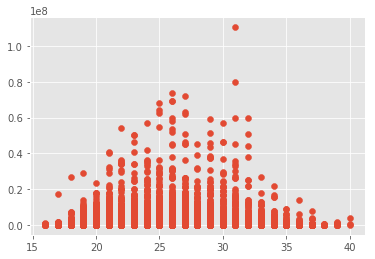

In [35]:
#연속형
plt.scatter(fifa_train['age'], fifa_train['value'])

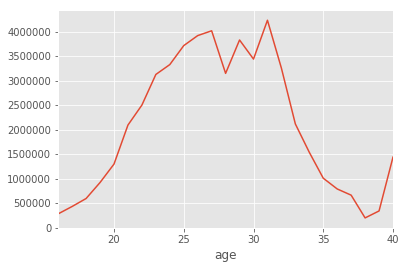

In [37]:
fifa_train.groupby(['age'])['value'].mean().plot()